In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import warnings
from IPython.display import Image
import ipywidgets as widgets


In [5]:
co2 = pd.read_csv(r"C:\Users\anike\Downloads\energy.csv")

In [6]:
co2

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [7]:
co2.Energy_type.unique()

array(['all_energy_types', 'coal', 'natural_gas',
       'petroleum_n_other_liquids', 'nuclear', 'renewables_n_other'],
      dtype=object)

In [8]:
co2.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [9]:
co2.describe()

,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,55440.000000,55440.0000,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
mean,27719.500000,1999.5000,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,16004.293799,11.5435,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,0.000000,1980.0000,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,13859.750000,1989.7500,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,27719.500000,1999.5000,0.018381,5.121971e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,41579.250000,2009.2500,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822
max,55439.000000,2019.0000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


In [10]:
# To find out total number of missing values in each column.

co2.isnull().sum()

Unnamed: 0                         0
Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64

In [11]:
# filling the null values using median 

co2['Energy_consumption'].fillna(co2['Energy_consumption'].median(), inplace=True)
co2['Energy_production'].fillna(co2['Energy_production'].median(), inplace=True)
co2['GDP'].fillna(co2['GDP'].median(), inplace=True)
co2['Population'].fillna(co2['Population'].median(), inplace=True)
co2['Energy_intensity_per_capita'].fillna(co2['Energy_intensity_per_capita'].median(), inplace=True)
co2['Energy_intensity_by_GDP'].fillna(co2['Energy_intensity_by_GDP'].median(), inplace=True)
co2['CO2_emission'].fillna(co2['CO2_emission'].median(), inplace=True)


In [12]:
co2.isnull().sum()

Unnamed: 0                     0
Country                        0
Energy_type                    0
Year                           0
Energy_consumption             0
Energy_production              0
GDP                            0
Population                     0
Energy_intensity_per_capita    0
Energy_intensity_by_GDP        0
CO2_emission                   0
dtype: int64

<Axes: >

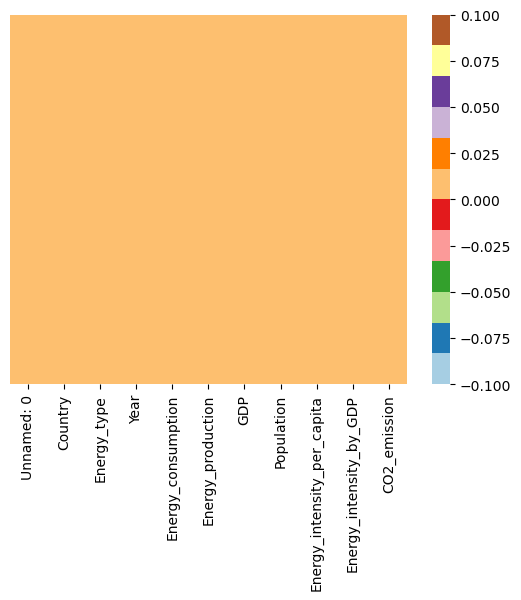

In [13]:
#plotting a heatmap to check if null values are removed are not
sns.heatmap(co2.isnull(),yticklabels=False,cmap="Paired") 

In [14]:
#Taking the sample of data for further model operations
df1 = co2.sample(5500)

In [15]:
# spliting the data into categorial and numerical data for better understanding and to perform tasks

cat_data=df1.select_dtypes(include=object)
num_data=df1.select_dtypes(exclude=object)

In [16]:
cat_data

,Country,Energy_type
13035,Haiti,petroleum_n_other_liquids
23636,Austria,natural_gas
39242,Former Yugoslavia,natural_gas
18581,Haiti,renewables_n_other
11488,Faroe Islands,nuclear
...,...,...
53016,Egypt,all_energy_types
11620,Guam,nuclear
328,Djibouti,nuclear
29786,Kuwait,natural_gas


In [17]:
num_data

,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,1989,0.017627,0.000000,25.5690,6897.750,3.165138,0.853859,1.300000
23636,23636,1997,0.288381,0.050783,315.9458,7968.811,166.719743,4.205019,15.876152
39242,39242,2008,0.018381,0.000512,47.7571,6157.680,29.779260,2.987593,0.000000
18581,18581,1993,0.002794,0.002794,23.5465,7460.680,1.555902,0.492986,0.000000
11488,11488,1988,0.018381,0.000512,47.7571,6157.680,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
53016,53016,2018,4.030794,3.923226,1222.6800,98406.500,40.960651,3.296688,234.798183
11620,11620,1988,0.018381,0.000512,47.7571,124.673,89.726632,0.000000,0.000000
328,328,1980,0.018381,0.000512,47.7571,358.960,60.316407,0.000000,0.000000
29786,29786,2001,0.314286,0.314286,97.0641,2103.270,400.308736,8.674241,18.832895


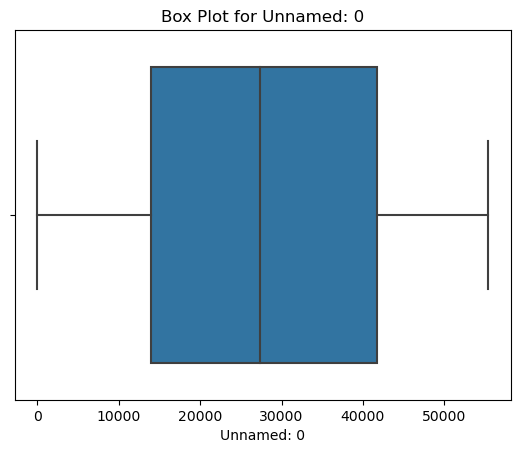

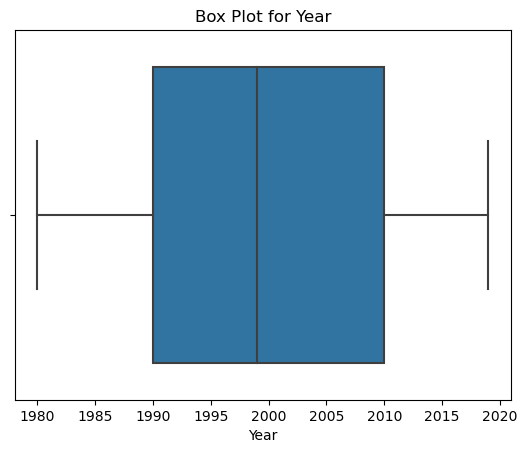

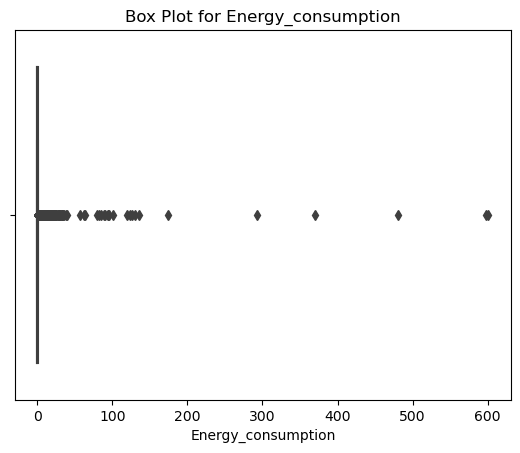

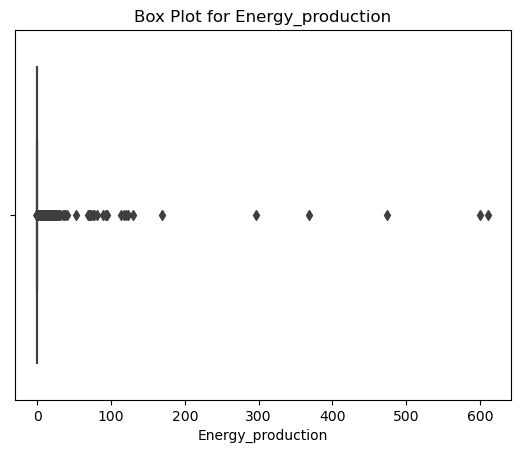

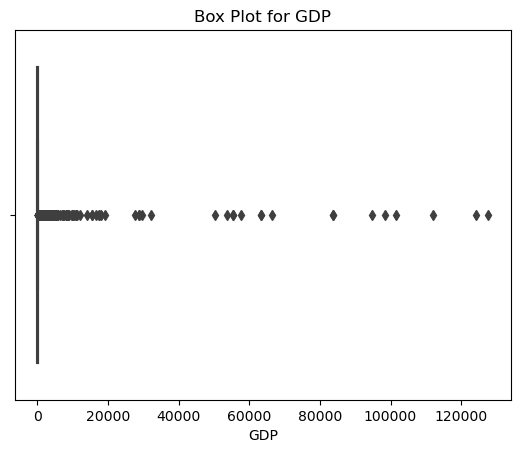

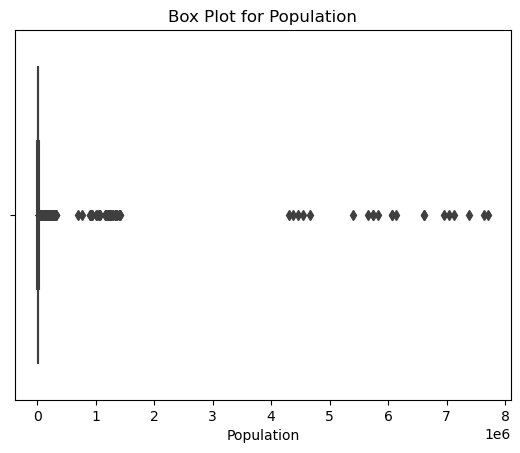

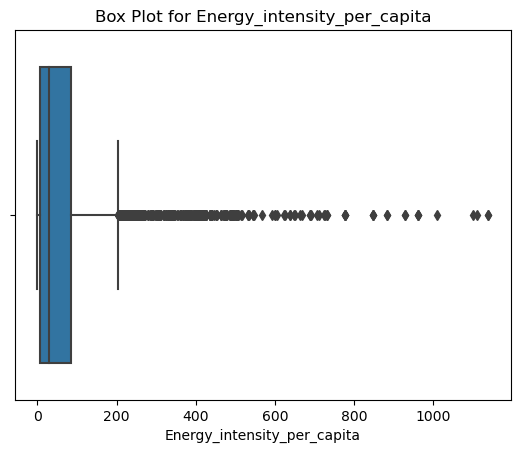

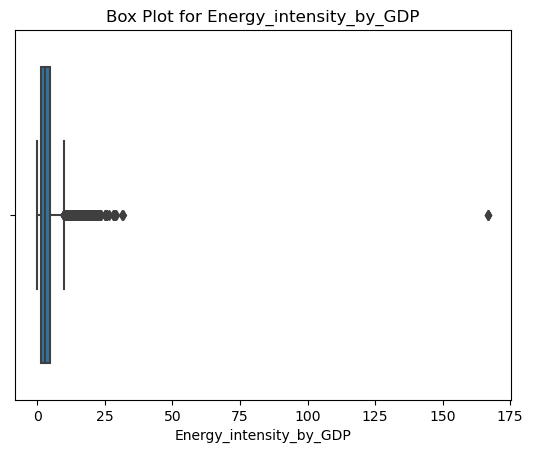

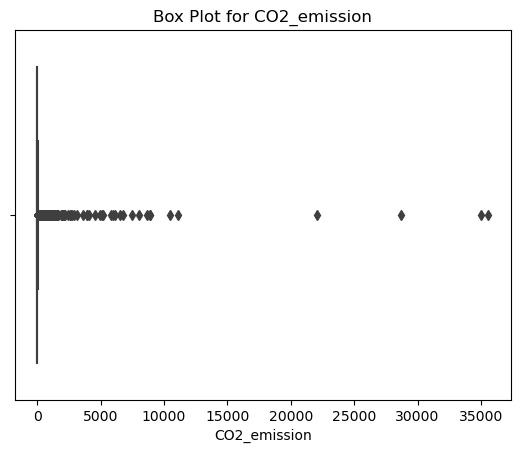

In [33]:
# Plotting box plot for all numerical data to check the any outliers are there are not

for i in num_data:
    sns.boxplot(x=df1[i])
    plt.title(f'Box Plot for {i}')
    plt.show()


<Axes: ylabel='count'>

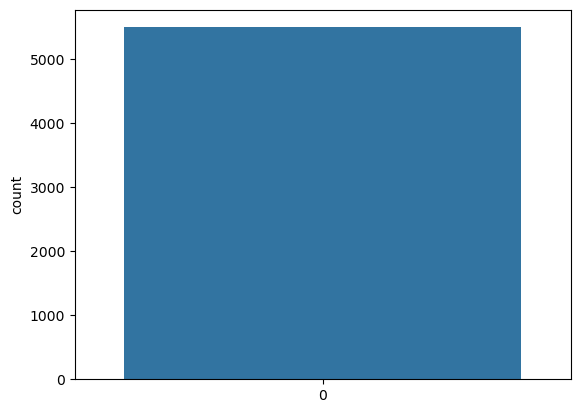

In [34]:
# count plot for Energy_production
sns.countplot(df1['Energy_production'])

<Axes: >

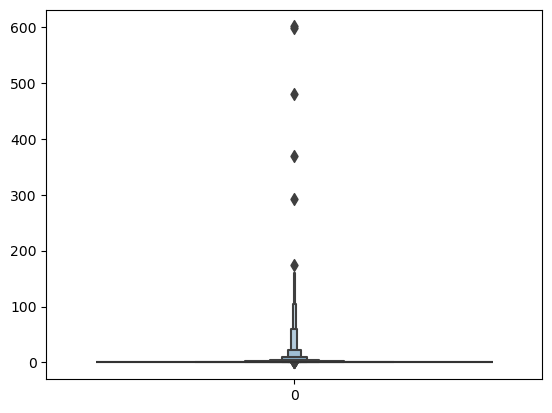

In [35]:
sns.boxenplot(df1['Energy_consumption'])

In [18]:
df1.shape

(5500, 11)

In [19]:
# Removing the outliers from each columns having outliers with z score method

from scipy import stats
z_scores=stats.zscore(df1['Energy_production'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df1[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:        Unnamed: 0          Country                Energy_type  Year  \
48444       48444    United States           all_energy_types  2014   
27354       27354           Russia           all_energy_types  1999   
8318         8318            World                natural_gas  1986   
34652       34652            World                natural_gas  2005   
38442       38442           Russia           all_energy_types  2007   
42968       42968            World                natural_gas  2011   
43986       43986           Russia           all_energy_types  2011   
8319         8319            World  petroleum_n_other_liquids  1986   
32125       32125            China                       coal  2003   
48512       48512            World                natural_gas  2015   
40128       40128    United States           all_energy_types  2008   
25194       25194            China           all_energy_types  1998   
52914       52914            China           al

In [20]:
x=(z_scores>-3)&(z_scores<3)
df1_new=df1[x]

In [21]:
df1_new

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.5690,6897.750,3.165138,0.853859,1.300000
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.9458,7968.811,166.719743,4.205019,15.876152
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.7571,6157.680,29.779260,2.987593,0.000000
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.5465,7460.680,1.555902,0.492986,0.000000
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.7571,6157.680,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53016,53016,Egypt,all_energy_types,2018,4.030794,3.923226,1222.6800,98406.500,40.960651,3.296688,234.798183
11620,11620,Guam,nuclear,1988,0.018381,0.000512,47.7571,124.673,89.726632,0.000000,0.000000
328,328,Djibouti,nuclear,1980,0.018381,0.000512,47.7571,358.960,60.316407,0.000000,0.000000
29786,29786,Kuwait,natural_gas,2001,0.314286,0.314286,97.0641,2103.270,400.308736,8.674241,18.832895


In [22]:
from scipy import stats
z_scores=stats.zscore(df1_new['Energy_consumption'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df1_new[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:        Unnamed: 0         Country                Energy_type  Year  \
8562         8562           China           all_energy_types  1986   
216           216          Canada           all_energy_types  1980   
36252       36252          Canada           all_energy_types  2006   
52672       52672           World                    nuclear  2018   
39246       39246          France           all_energy_types  2008   
...           ...             ...                        ...   ...   
44040       44040    Saudi Arabia           all_energy_types  2011   
20794       20794           World                    nuclear  1995   
47373       47373           China  petroleum_n_other_liquids  2014   
39024       39024          Canada           all_energy_types  2008   
20718       20718  United Kingdom           all_energy_types  1994   

       Energy_consumption  Energy_production            GDP    Population  \
8562            25.023289          27.068473    1236

In [23]:
x=(z_scores>-3)&(z_scores<3)
df2_new=df1_new[x]

In [24]:
df2_new

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.5690,6897.750,3.165138,0.853859,1.300000
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.9458,7968.811,166.719743,4.205019,15.876152
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.7571,6157.680,29.779260,2.987593,0.000000
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.5465,7460.680,1.555902,0.492986,0.000000
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.7571,6157.680,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53016,53016,Egypt,all_energy_types,2018,4.030794,3.923226,1222.6800,98406.500,40.960651,3.296688,234.798183
11620,11620,Guam,nuclear,1988,0.018381,0.000512,47.7571,124.673,89.726632,0.000000,0.000000
328,328,Djibouti,nuclear,1980,0.018381,0.000512,47.7571,358.960,60.316407,0.000000,0.000000
29786,29786,Kuwait,natural_gas,2001,0.314286,0.314286,97.0641,2103.270,400.308736,8.674241,18.832895


In [25]:
from scipy import stats
z_scores=stats.zscore(df2_new['GDP'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df2_new[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:        Unnamed: 0         Country                Energy_type  Year  \
28197       28197         Germany  petroleum_n_other_liquids  2000   
38967       38967          Brazil  petroleum_n_other_liquids  2008   
34285       34285          Russia                       coal  2004   
53110       53110          France                    nuclear  2018   
46382       46382           Japan                natural_gas  2013   
...           ...             ...                        ...   ...   
47768       47768           Japan                natural_gas  2014   
45669       45669  United Kingdom  petroleum_n_other_liquids  2012   
14504       14504           Japan                natural_gas  1990   
47374       47374           China                    nuclear  2014   
16571       16571   United States         renewables_n_other  1991   

       Energy_consumption  Energy_production        GDP  Population  \
28197            5.720482           0.138413   3288.035   

In [26]:
x=(z_scores>-3)&(z_scores<3)
df3_new=df2_new[x]

In [27]:
df3_new

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.5690,6897.750,3.165138,0.853859,1.300000
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.9458,7968.811,166.719743,4.205019,15.876152
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.7571,6157.680,29.779260,2.987593,0.000000
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.5465,7460.680,1.555902,0.492986,0.000000
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.7571,6157.680,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53016,53016,Egypt,all_energy_types,2018,4.030794,3.923226,1222.6800,98406.500,40.960651,3.296688,234.798183
11620,11620,Guam,nuclear,1988,0.018381,0.000512,47.7571,124.673,89.726632,0.000000,0.000000
328,328,Djibouti,nuclear,1980,0.018381,0.000512,47.7571,358.960,60.316407,0.000000,0.000000
29786,29786,Kuwait,natural_gas,2001,0.314286,0.314286,97.0641,2103.270,400.308736,8.674241,18.832895


In [28]:
from scipy import stats
z_scores=stats.zscore(df3_new['Population'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df3_new[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:        Unnamed: 0    Country                Energy_type  Year  \
15845       15845      India         renewables_n_other  1991   
42184       42184  Indonesia                    nuclear  2010   
31097       31097  Indonesia         renewables_n_other  2002   
52184       52184    Nigeria                natural_gas  2017   
52229       52229   Pakistan         renewables_n_other  2017   
22775       22775      India         renewables_n_other  1996   
36194       36194     Brazil                natural_gas  2006   
50799       50799    Nigeria  petroleum_n_other_liquids  2016   
54996       54996   Pakistan           all_energy_types  2019   
14459       14459      India         renewables_n_other  1990   
40796       40796  Indonesia                natural_gas  2009   
17233       17233  Indonesia                       coal  1992   
25544       25544      India                natural_gas  1998   
14455       14455      India                       coal  199

In [29]:
x=(z_scores>-3)&(z_scores<3)
df4_new=df3_new[x]

In [30]:
df4_new

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.5690,6897.750,3.165138,0.853859,1.300000
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.9458,7968.811,166.719743,4.205019,15.876152
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.7571,6157.680,29.779260,2.987593,0.000000
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.5465,7460.680,1.555902,0.492986,0.000000
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.7571,6157.680,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53016,53016,Egypt,all_energy_types,2018,4.030794,3.923226,1222.6800,98406.500,40.960651,3.296688,234.798183
11620,11620,Guam,nuclear,1988,0.018381,0.000512,47.7571,124.673,89.726632,0.000000,0.000000
328,328,Djibouti,nuclear,1980,0.018381,0.000512,47.7571,358.960,60.316407,0.000000,0.000000
29786,29786,Kuwait,natural_gas,2001,0.314286,0.314286,97.0641,2103.270,400.308736,8.674241,18.832895


In [31]:
from scipy import stats
z_scores=stats.zscore(df4_new['Energy_intensity_per_capita'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df4_new[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:        Unnamed: 0               Country                Energy_type  Year  \
55163       55163             Singapore         renewables_n_other  2019   
38529       38529             Singapore  petroleum_n_other_liquids  2007   
48683       48683                Brunei         renewables_n_other  2015   
39542       39542            Luxembourg                natural_gas  2008   
1475         1475               Bahrain         renewables_n_other  1981   
...           ...                   ...                        ...   ...   
35582       35582                Norway                natural_gas  2005   
4691         4691                  Guam         renewables_n_other  1983   
32810       32810                Norway                natural_gas  2003   
41506       41506  United Arab Emirates                    nuclear  2009   
29786       29786                Kuwait                natural_gas  2001   

       Energy_consumption  Energy_production       GDP  P

In [32]:
x=(z_scores>-3)&(z_scores<3)
df5_new=df4_new[x]

In [33]:
df5_new

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.56900,6897.750,3.165138,0.853859,1.300000
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.94580,7968.811,166.719743,4.205019,15.876152
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.75710,6157.680,29.779260,2.987593,0.000000
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.54650,7460.680,1.555902,0.492986,0.000000
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.75710,6157.680,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
50275,50275,Eswatini,coal,2016,0.002038,0.003729,9.83508,1113.990,18.608911,2.107775,0.190092
53016,53016,Egypt,all_energy_types,2018,4.030794,3.923226,1222.68000,98406.500,40.960651,3.296688,234.798183
11620,11620,Guam,nuclear,1988,0.018381,0.000512,47.75710,124.673,89.726632,0.000000,0.000000
328,328,Djibouti,nuclear,1980,0.018381,0.000512,47.75710,358.960,60.316407,0.000000,0.000000


In [34]:
from scipy import stats
z_scores=stats.zscore(df5_new['Energy_intensity_by_GDP'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df5_new[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:        Unnamed: 0       Country                Energy_type  Year  \
32790       32790   North Korea           all_energy_types  2003   
33140       33140  Turkmenistan                natural_gas  2003   
23091       23091   North Korea  petroleum_n_other_liquids  1996   
16687       16687       Armenia                       coal  1992   
21476       21476    Kyrgyzstan                natural_gas  1995   
...           ...           ...                        ...   ...   
19486       19486    Azerbaijan                    nuclear  1994   
2949         2949      Bulgaria  petroleum_n_other_liquids  1982   
16159       16159   North Korea                       coal  1991   
25028       25028    Azerbaijan                natural_gas  1998   
28405       28405    Kyrgyzstan                       coal  2000   

       Energy_consumption  Energy_production       GDP  Population  \
32790            0.927382           0.722514  41.19870   23542.400   
33140        

In [35]:
x=(z_scores>-3)&(z_scores<3)
df6_new=df5_new[x]

In [36]:
df6_new

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.56900,6897.750,3.165138,0.853859,1.300000
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.94580,7968.811,166.719743,4.205019,15.876152
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.75710,6157.680,29.779260,2.987593,0.000000
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.54650,7460.680,1.555902,0.492986,0.000000
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.75710,6157.680,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
50275,50275,Eswatini,coal,2016,0.002038,0.003729,9.83508,1113.990,18.608911,2.107775,0.190092
53016,53016,Egypt,all_energy_types,2018,4.030794,3.923226,1222.68000,98406.500,40.960651,3.296688,234.798183
11620,11620,Guam,nuclear,1988,0.018381,0.000512,47.75710,124.673,89.726632,0.000000,0.000000
328,328,Djibouti,nuclear,1980,0.018381,0.000512,47.75710,358.960,60.316407,0.000000,0.000000


In [37]:
from scipy import stats
z_scores=stats.zscore(df6_new['CO2_emission'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=df6_new[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:        Unnamed: 0        Country                Energy_type  Year  \
7410         7410  Germany, East           all_energy_types  1985   
51937       51937     Kazakhstan                       coal  2017   
42564       42564         Poland           all_energy_types  2010   
28872       28872          Spain           all_energy_types  2000   
33423       33423         Brazil  petroleum_n_other_liquids  2004   
...           ...            ...                        ...   ...   
45150       45150         Mexico           all_energy_types  2012   
35258       35258           Iran                natural_gas  2005   
44118       44118          Spain           all_energy_types  2011   
30360       30360         Turkey           all_energy_types  2001   
53016       53016          Egypt           all_energy_types  2018   

       Energy_consumption  Energy_production        GDP  Population  \
7410             6.187990           5.293150    47.7571     6157.68   

In [38]:
x=(z_scores>-3)&(z_scores<3)
df=df6_new[x]

In [39]:
df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.56900,6897.750,3.165138,0.853859,1.300000
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.94580,7968.811,166.719743,4.205019,15.876152
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.75710,6157.680,29.779260,2.987593,0.000000
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.54650,7460.680,1.555902,0.492986,0.000000
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.75710,6157.680,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5044,5044,New Zealand,nuclear,1983,0.018381,0.000512,73.05250,3226.058,157.020774,6.934165,0.000000
50275,50275,Eswatini,coal,2016,0.002038,0.003729,9.83508,1113.990,18.608911,2.107775,0.190092
11620,11620,Guam,nuclear,1988,0.018381,0.000512,47.75710,124.673,89.726632,0.000000,0.000000
328,328,Djibouti,nuclear,1980,0.018381,0.000512,47.75710,358.960,60.316407,0.000000,0.000000


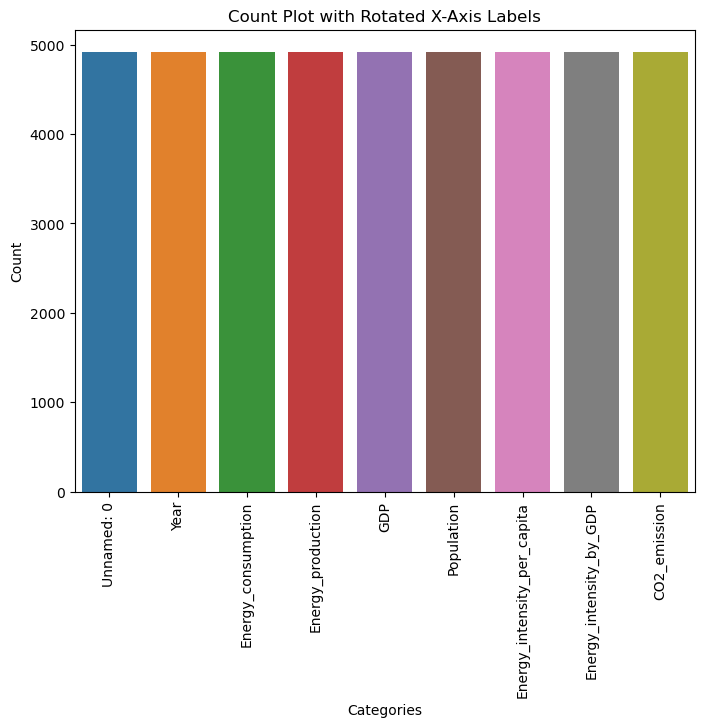

['',
 "cm=confusion_matrix(y_test,y_pred)\nprint(cm)\nsns.heatmap(cm, annot=True, fmt='.3g')\nplt.title('Confusion Matrix - Test Data')\nplt.xlabel('Predicted Label')\nplt.ylabel('True Label')\nplt.show()",
 'from sklearn import model_selection, naive_bayes, svm, metrics,feature_extraction',
 "x = pd.concat([encoder_cols,Scaled],axis=1)\ny = df['co2level']",
 'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler\nimport warnings\nfrom IPython.display import Image\nimport ipywidgets as widgets',
 'co2 = pd.read_csv(r"C:\\Users\\anike\\Downloads\\energy.csv")',
 'co2',
 'co2.Energy_type.unique()',
 'co2.head()',
 'co2.describe()',
 '# To find out total number of missing values in each column.\n\nco2.isnull().sum()',
 "#

In [40]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.countplot(df)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Count Plot with Rotated X-Axis Labels")
plt.show()
In 

In [41]:
df.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.5690,6897.750,3.165138,0.853859,1.300000
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.9458,7968.811,166.719743,4.205019,15.876152
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.7571,6157.680,29.779260,2.987593,0.000000
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.5465,7460.680,1.555902,0.492986,0.000000
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.7571,6157.680,0.000000,0.000000,0.000000


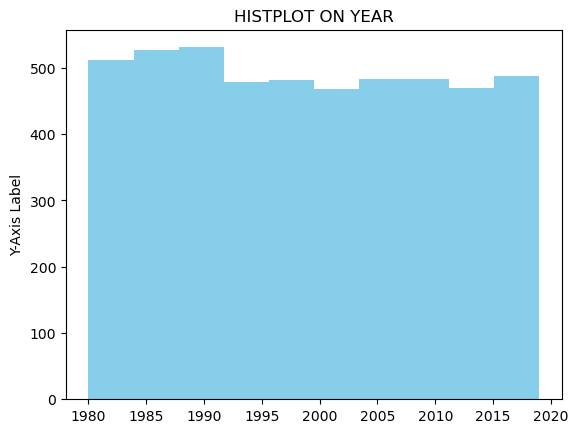

In [42]:
plt.hist(df['Year'], bins=10, color='skyblue')
 
plt.xlabel('')
plt.ylabel('Y-Axis Label')
plt.title('HISTPLOT ON YEAR')
plt.show()


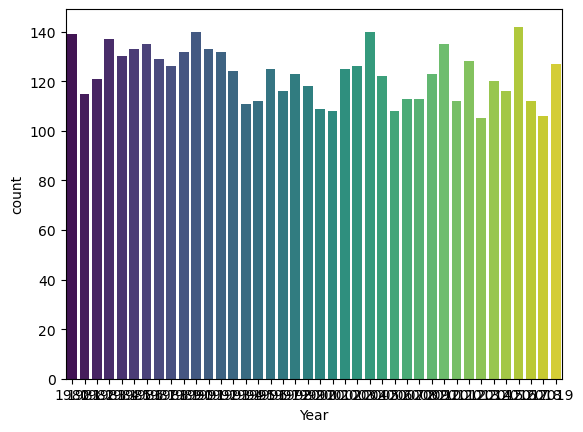

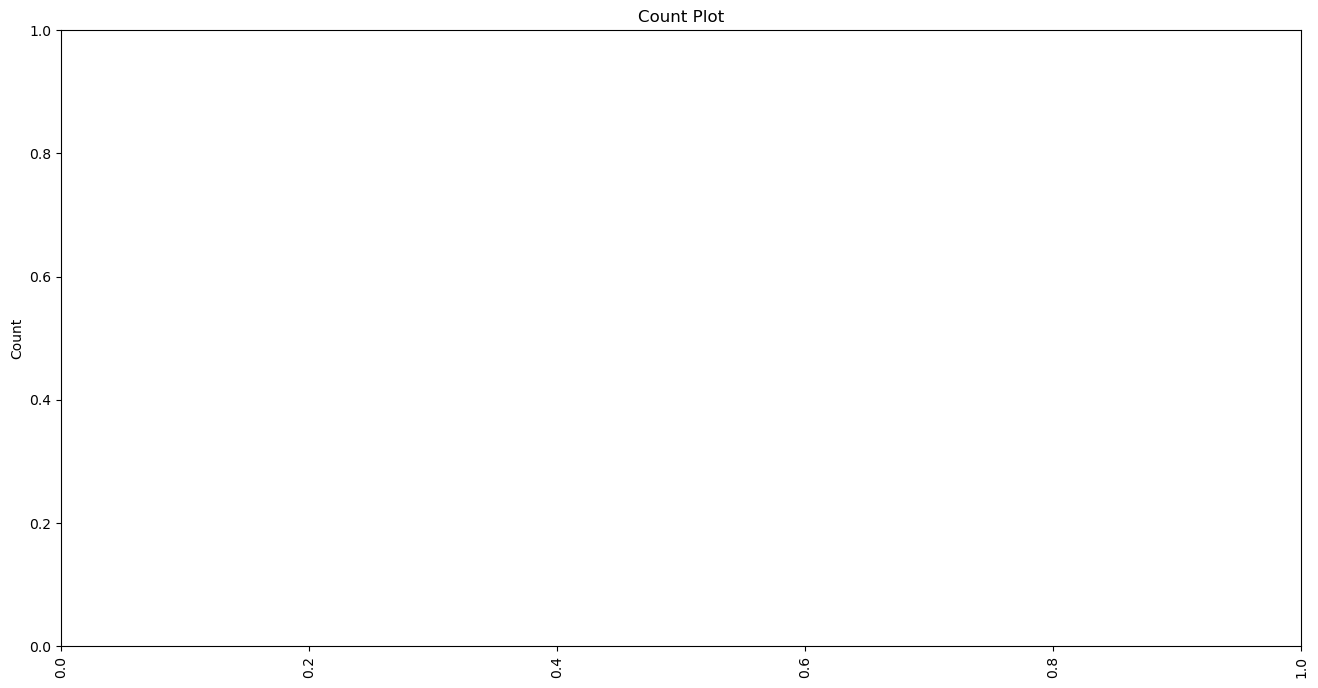

In [43]:
sns.countplot(x='Year', data=df, palette='viridis')
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count Plot')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


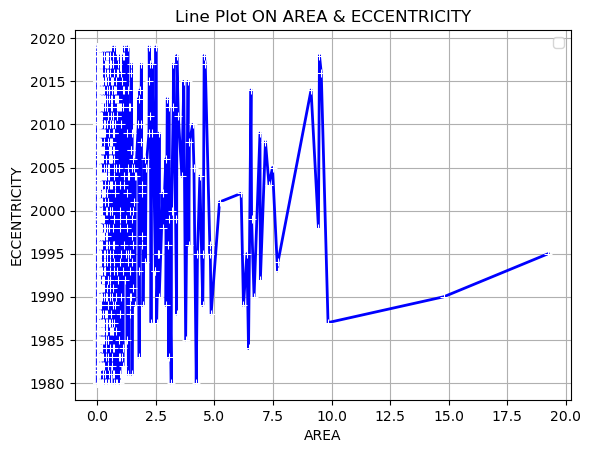

In [44]:
sns.lineplot(x='Energy_production', y='Year', data=df, marker='+', color='b', linewidth=2)

plt.xlabel('AREA')
plt.ylabel('ECCENTRICITY')
plt.title('Line Plot ON AREA & ECCENTRICITY')
plt.legend()  
plt.grid(True)  
plt.show()

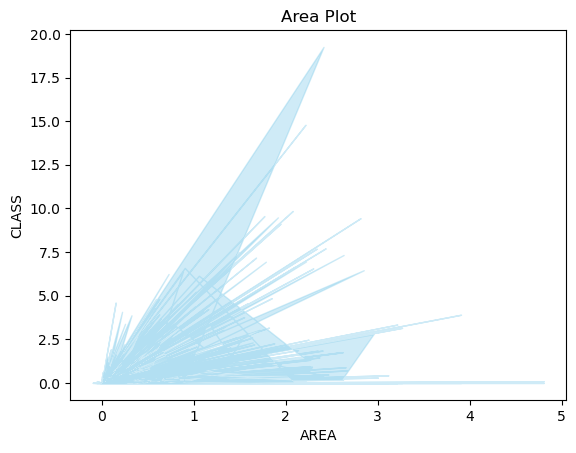

In [45]:
plt.fill_between(df['Energy_consumption'], df['Energy_production'], color='skyblue', alpha=0.4)
plt.xlabel('AREA')
plt.ylabel('CLASS')
plt.title('Area Plot')
plt.show()


C:\Users\anike\AppData\Local\Temp\ipykernel_11296\4110412429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


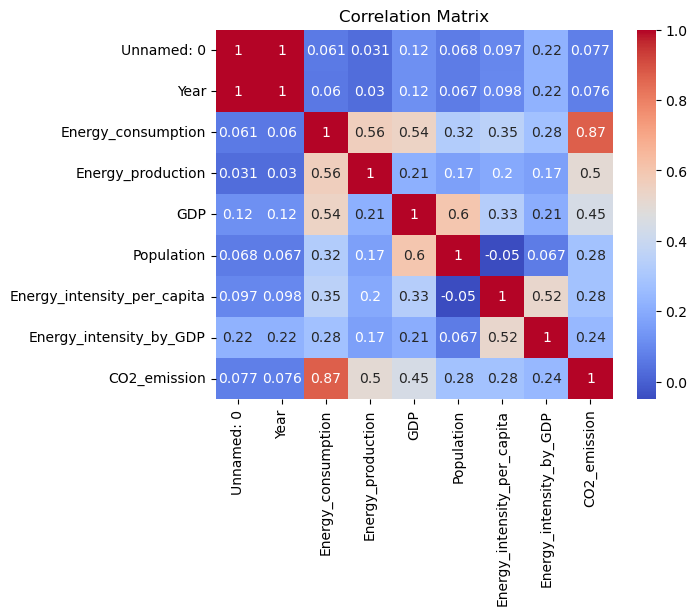

In [46]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [47]:
D_country=df['Year'].value_counts()

In [48]:
D_country

2016    142
1990    140
2004    140
1980    139
1983    137
1986    135
2010    135
1985    133
1991    133
1989    132
1992    132
1984    130
1987    129
2012    128
2019    127
1988    126
2003    126
1996    125
2002    125
1993    124
2009    123
1998    123
2005    122
1982    121
2014    120
1999    118
1997    116
2015    116
1981    115
2007    113
2008    113
2017    112
1995    112
2011    112
1994    111
2000    109
2001    108
2006    108
2018    106
2013    105
Name: Year, dtype: int64

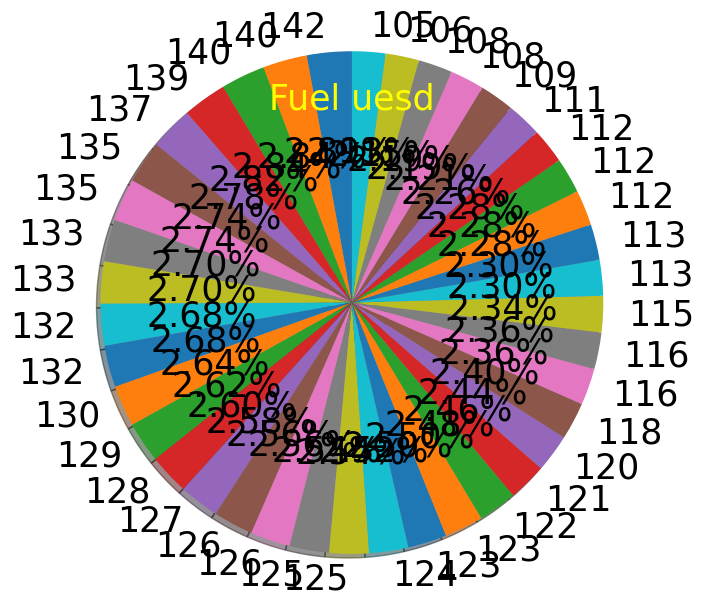

In [49]:
# Create a pie chart
plt.pie(D_country, labels=D_country, autopct='%0.2f%%',shadow=True,radius=1.7,startangle=90,textprops={"fontsize":25})
plt.title('Fuel uesd',{"fontsize":25},color='Yellow')


plt.show()


<Axes: xlabel='Country'>

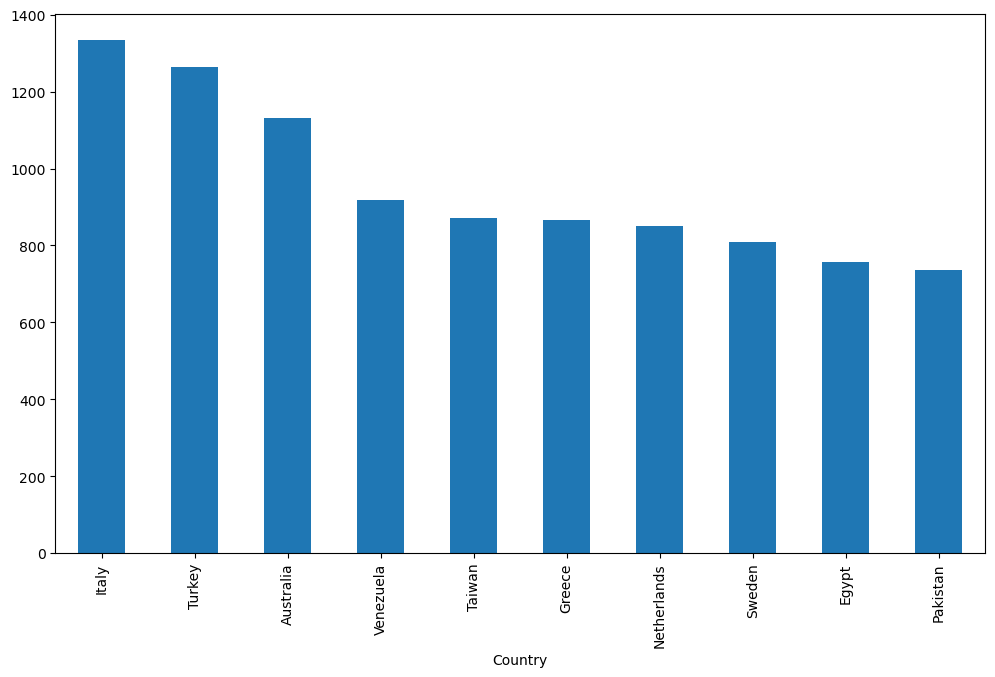

In [50]:
fig1,ax1=plt.subplots(figsize=(12,7))
df.groupby('Country')['CO2_emission'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: >

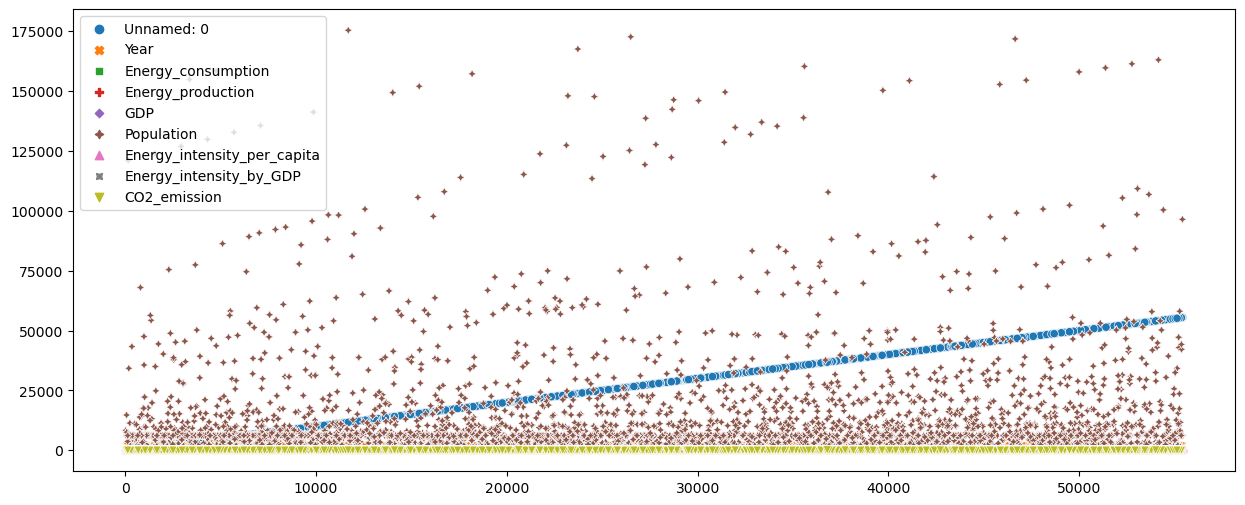

In [69]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.scatterplot(df)

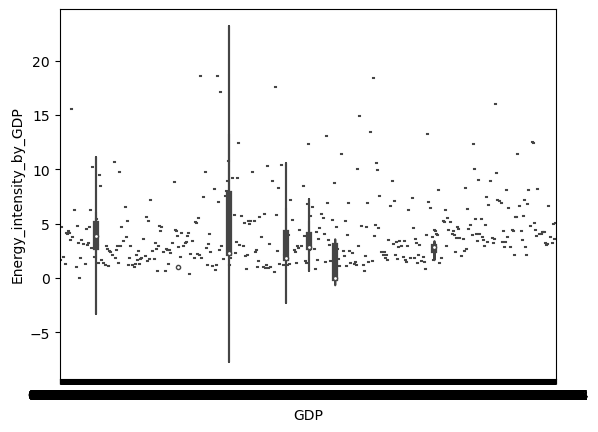

In [70]:
sns.violinplot(x='GDP', y='Energy_intensity_by_GDP', data=df)
plt.show()


C:\Users\anike\AppData\Local\Temp\ipykernel_21044\2613781706.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Population', y='CO2_emission', data=df, jitter=True, palette='Set1')


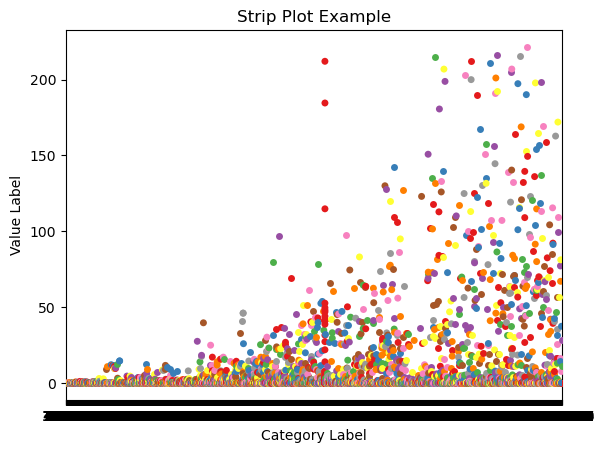

In [71]:
sns.stripplot(x='Population', y='CO2_emission', data=df, jitter=True, palette='Set1')

# Optional: Add more customization
plt.xlabel('Category Label')
plt.ylabel('Value Label')
plt.title('Strip Plot Example')
plt.show()

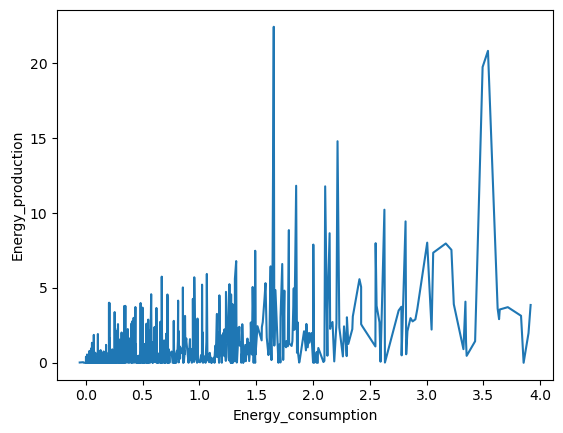

In [72]:
sns.lineplot(x='Energy_consumption', y='Energy_production', data=df)
plt.show()


In [51]:
df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.56900,6897.750,3.165138,0.853859,1.300000
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.94580,7968.811,166.719743,4.205019,15.876152
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.75710,6157.680,29.779260,2.987593,0.000000
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.54650,7460.680,1.555902,0.492986,0.000000
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.75710,6157.680,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5044,5044,New Zealand,nuclear,1983,0.018381,0.000512,73.05250,3226.058,157.020774,6.934165,0.000000
50275,50275,Eswatini,coal,2016,0.002038,0.003729,9.83508,1113.990,18.608911,2.107775,0.190092
11620,11620,Guam,nuclear,1988,0.018381,0.000512,47.75710,124.673,89.726632,0.000000,0.000000
328,328,Djibouti,nuclear,1980,0.018381,0.000512,47.75710,358.960,60.316407,0.000000,0.000000


# ENcoding 

In [52]:
# converting the categorical data into numerical form with oneHotEncoding

categorical_col = ['Country','Energy_type']
encoder = OneHotEncoder(drop='first',sparse=False)
encoder_cols = pd.DataFrame(encoder.fit_transform(df[categorical_col]),columns=encoder.get_feature_names_out(categorical_col))

C:\Users\anike\anaconda3\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [53]:
numerical_col = ['Unnamed: 0','Year','Energy_consumption','Energy_production','GDP','Energy_intensity_per_capita','Energy_intensity_by_GDP']
Scaled = StandardScaler()
Scaled= pd.DataFrame(Scaled.fit_transform(df[numerical_col]),columns=numerical_col)

In [54]:
Scaled

,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Energy_intensity_per_capita,Energy_intensity_by_GDP
0,-0.880801,-0.872781,-0.311945,-0.197043,-0.370698,-0.693096,-0.801557
1,-0.221633,-0.183520,0.418902,-0.125803,0.628313,1.736336,0.481061
2,0.748745,0.764213,-0.309910,-0.196325,-0.294362,-0.297771,0.015105
3,-0.535952,-0.528150,-0.351984,-0.193124,-0.377656,-0.716999,-0.939677
4,-0.976993,-0.958938,-0.309910,-0.196325,-0.294362,-0.740110,-1.128361
...,...,...,...,...,...,...,...
4916,-1.377680,-1.389726,-0.309910,-0.196325,-0.207336,1.592268,1.525610
4917,1.434774,1.453473,-0.354025,-0.191812,-0.424829,-0.463695,-0.321635
4918,-0.968786,-0.958938,-0.309910,-0.196325,-0.294362,0.592684,-1.128361
4919,-1.670920,-1.648198,-0.309910,-0.196325,-0.294362,0.155826,-1.128361


In [55]:
# splitting the data in independent (x) ad

x = pd.concat([encoder_cols,Scaled],axis=1)
y = df['CO2_emission']

In [56]:
x

,Country_Albania,Country_Algeria,Country_American Samoa,Country_Angola,Country_Antarctica,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,...,Energy_type_nuclear,Energy_type_petroleum_n_other_liquids,Energy_type_renewables_n_other,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Energy_intensity_per_capita,Energy_intensity_by_GDP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.880801,-0.872781,-0.311945,-0.197043,-0.370698,-0.693096,-0.801557
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.221633,-0.183520,0.418902,-0.125803,0.628313,1.736336,0.481061
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.748745,0.764213,-0.309910,-0.196325,-0.294362,-0.297771,0.015105
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.535952,-0.528150,-0.351984,-0.193124,-0.377656,-0.716999,-0.939677
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.976993,-0.958938,-0.309910,-0.196325,-0.294362,-0.740110,-1.128361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.377680,-1.389726,-0.309910,-0.196325,-0.207336,1.592268,1.525610
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.434774,1.453473,-0.354025,-0.191812,-0.424829,-0.463695,-0.321635
4918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.968786,-0.958938,-0.309910,-0.196325,-0.294362,0.592684,-1.128361
4919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.670920,-1.648198,-0.309910,-0.196325,-0.294362,0.155826,-1.128361


In [57]:
y

13035     1.300000
23636    15.876152
39242     0.000000
18581     0.000000
11488     0.000000
           ...    
5044      0.000000
50275     0.190092
11620     0.000000
328       0.000000
7093      0.000000
Name: CO2_emission, Length: 4921, dtype: float64

In [58]:
x.shape

(4921, 235)

# performing Linear Regression 

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import warnings


In [61]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [62]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [63]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [64]:
R2= r2_score(y_test,y_pred)

In [65]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [66]:
print('Mean Absolute Error',mae)
print('Mean Squared error',rmse)
print('Root Mean Squared Error',rmse)
print('R2 Score',r2)

Mean Absolute Error 3.7632274827844694
Mean Squared error 8.447453290991518
Root Mean Squared Error 8.447453290991518
R2 Score 0.8407519741203433


In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [68]:
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model,x_train,y_train,cv=5)
#use scoring method f1_macro or neg_mean-sqaured_erro

In [69]:
ridge_model= Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model , x_train , y_train , cv = 5) # use scoring method f1 macro or neg_mean_sqaured_eror

In [70]:
Lasso_model= Lasso(alpha=1.0)
Lasso_scores = cross_val_score(Lasso_model , x_train , y_train , cv = 5) # use scoring method f1 macro or neg_mean_sqaured_eror

In [71]:
lr_model.fit(x_train,y_train)
lr_prediction = lr_model.predict(x_test)
lr_mae = mean_absolute_error(y_test,lr_prediction)
lr_mse = mean_squared_error(y_test,lr_prediction)
lr_r2 = r2_score(y_test,lr_prediction)

In [72]:
print('Linear MAE',lr_mae)
print('Linear MSE',lr_mse)
print('Linear R2',lr_r2)

Linear MAE 3.7632274827844694
Linear MSE 71.35946710348344
Linear R2 0.8407519741203433


In [73]:
Lasso_model.fit(x_train , y_train)
Lasso_prediction = Lasso_model.predict(x_test)
Lasso_mae = mean_absolute_error(y_test ,Lasso_prediction)
Lasso_mse = mean_squared_error(y_test ,Lasso_prediction)
Lasso_r2 = r2_score(y_test ,Lasso_prediction)

In [74]:
print('Lasso MAE',Lasso_mae)
print('Lasso MSE',Lasso_mse)
print('Lasso R2',Lasso_r2)

Lasso MAE 3.492297681780567
Lasso MSE 90.04535068622926
Lasso R2 0.7990519699981978


In [1]:
ridge_model.fit(x_train , y_train)
ridge_prediction = ridge_model.predict(x_test)
ridge_mae = mean_absolute_error(y_test ,ridge_prediction)
ridge_mse = mean_squared_error(y_test ,ridge_prediction)
ridge_r2 = r2_score(y_test ,ridge_prediction)

NameError: name 'ridge_model' is not defined

In [76]:
print('Ridge MAE',ridge_mae)
print('Ridge MSE',ridge_mse)
print('Ridge R2',ridge_r2)

Ridge MAE 3.733232692402553
Ridge MSE 67.22479290109828
Ridge R2 0.8499790428066961


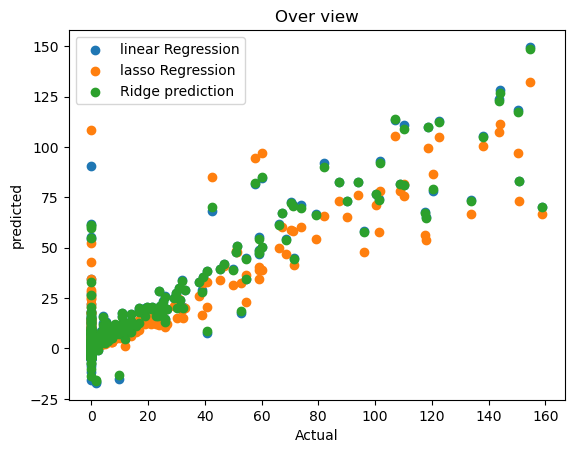

In [77]:
# PLOT FOR ALL
plt.scatter(y_test,lr_prediction,alpha = 1.0,label='linear Regression')
plt.scatter(y_test,Lasso_prediction,alpha=1.0,label= 'lasso Regression')
plt.scatter(y_test,ridge_prediction,alpha=1.0,label='Ridge prediction')

plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Over view')
plt.legend()

# PERFORMING LOGISTIC REGRESSION

In [78]:
def co2level (row):
    return 1 if row['CO2_emission'] >= 78.800082 else 0

In [79]:
df['co2level'] = df.apply(co2level,axis=1)

C:\Users\anike\AppData\Local\Temp\ipykernel_11296\325724546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['co2level'] = df.apply(co2level,axis=1)


In [80]:
df['co2level'].value_counts()

0    4813
1     108
Name: co2level, dtype: int64

In [81]:
numerical_col = ['Unnamed: 0','Year','Energy_consumption','Energy_production','GDP','Energy_intensity_per_capita','Energy_intensity_by_GDP','CO2_emission']
Scaled = StandardScaler()
Scaled= pd.DataFrame(Scaled.fit_transform(df[numerical_col]),columns=numerical_col)

In [82]:
df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,co2level
13035,13035,Haiti,petroleum_n_other_liquids,1989,0.017627,0.000000,25.56900,6897.750,3.165138,0.853859,1.300000,0
23636,23636,Austria,natural_gas,1997,0.288381,0.050783,315.94580,7968.811,166.719743,4.205019,15.876152,0
39242,39242,Former Yugoslavia,natural_gas,2008,0.018381,0.000512,47.75710,6157.680,29.779260,2.987593,0.000000,0
18581,18581,Haiti,renewables_n_other,1993,0.002794,0.002794,23.54650,7460.680,1.555902,0.492986,0.000000,0
11488,11488,Faroe Islands,nuclear,1988,0.018381,0.000512,47.75710,6157.680,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5044,5044,New Zealand,nuclear,1983,0.018381,0.000512,73.05250,3226.058,157.020774,6.934165,0.000000,0
50275,50275,Eswatini,coal,2016,0.002038,0.003729,9.83508,1113.990,18.608911,2.107775,0.190092,0
11620,11620,Guam,nuclear,1988,0.018381,0.000512,47.75710,124.673,89.726632,0.000000,0.000000,0
328,328,Djibouti,nuclear,1980,0.018381,0.000512,47.75710,358.960,60.316407,0.000000,0.000000,0


In [83]:
x = pd.concat([encoder_cols,Scaled],axis=1)
y = df['co2level']

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression


In [86]:
log = LogisticRegression()

In [87]:
log.fit(x_train,y_train)

LogisticRegression()

In [88]:
print("TrainScore",log.score(x_train,y_train))

TrainScore 0.9997459349593496


In [89]:
print("Test Score",log.score(x_test,y_test))

Test Score 1.0


In [90]:
pred_train = log.predict(x_train)
pred_test = log.predict(x_test)

In [173]:
acc_log=accuracy_score(y_test,pred_test)
acc_log

1.0

In [94]:
from sklearn import metrics        # actaul, predicted
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3854
           1       1.00      0.99      0.99        82

    accuracy                           1.00      3936
   macro avg       1.00      0.99      1.00      3936
weighted avg       1.00      1.00      1.00      3936



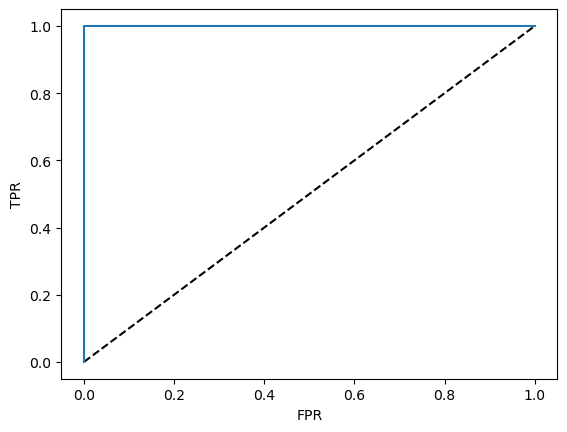

In [95]:
roc=log.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train,roc)
plt.plot([0,1], [0,1],'k--') #x=(0,1) y
plt.plot(fpr,tpr,label='logistic')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [96]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, pred_test)
print('MCC: ',mcc)

MCC:  1.0


In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV
param_grid ={
'penalty':["l1","l2"],
'C': [0.1,0.5,1,5,10]
} #l1 lasso l2 ridge to regularize the model , C common factor alpha LOS
grid=GridSearchCV(estimator=log, param_grid=param_grid, cv=5)
grid.fit(x_train,y_train)

C:\Users\anike\anaconda3\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anike\anaconda3\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anike\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anike\anaconda3\anaconda\Lib\si

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [99]:
best_param = grid.best_params_
best_model = grid.best_estimator_


In [100]:
y_pred=best_model.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [102]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [103]:
print('Best Param: ', best_param)
print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', pre)
print('F1 Score: ', f1)
print('AUC-ROC: ', roc_auc)

Best Param:  {'C': 1, 'penalty': 'l2'}
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1 Score:  1.0
AUC-ROC:  1.0


In [104]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)


Ridge(alpha=0.1)

In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validated accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Cross-validated accuracy: -100683471671032880.00 (+/- 402733886684131520.00)


# performing svm 

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [107]:
scaler = StandardScaler()

In [108]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [109]:
svcm = SVC(kernel='linear')

In [110]:
svcm.fit(x_train,y_train)

SVC(kernel='linear')

In [111]:
y_pred = svcm.predict(x_test)

In [112]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [113]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}%'. format(acc*100))

Accuracy:99.70%


In [151]:
#calculating the accuracy of model
acc_svm=accuracy_score(y_test,y_pred)
acc_svm

0.9969543147208122

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       959
           1       0.96      0.92      0.94        26

    accuracy                           1.00       985
   macro avg       0.98      0.96      0.97       985
weighted avg       1.00      1.00      1.00       985



In [116]:
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

confusion matrix:
[[958   1]
 [  2  24]]


<Axes: >

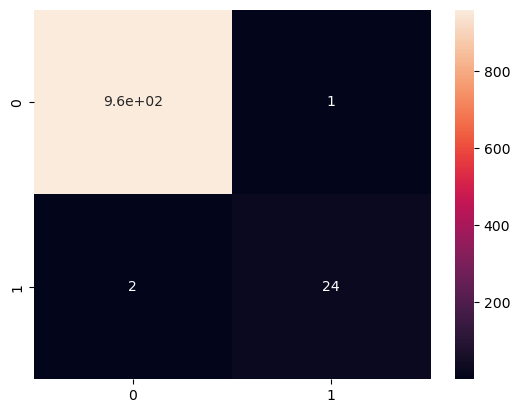

In [117]:
sns.heatmap(cm,annot=True)

In [118]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [119]:
yb = label_binarize(y,classes=[0,1])

In [120]:
nc = yb.shape[1]

In [121]:
classifier = OneVsRestClassifier(SVC(kernel='linear',probability=True,random_state=42))

In [122]:
y_score = classifier.fit(x_train,y_train).decision_function(x_test)

In [123]:
y_score_2d = y_score.reshape(-1, 1)


In [124]:
fpr, tpr, _ = roc_curve(y_test, y_score)


In [125]:
roc_auc = auc(fpr, tpr)


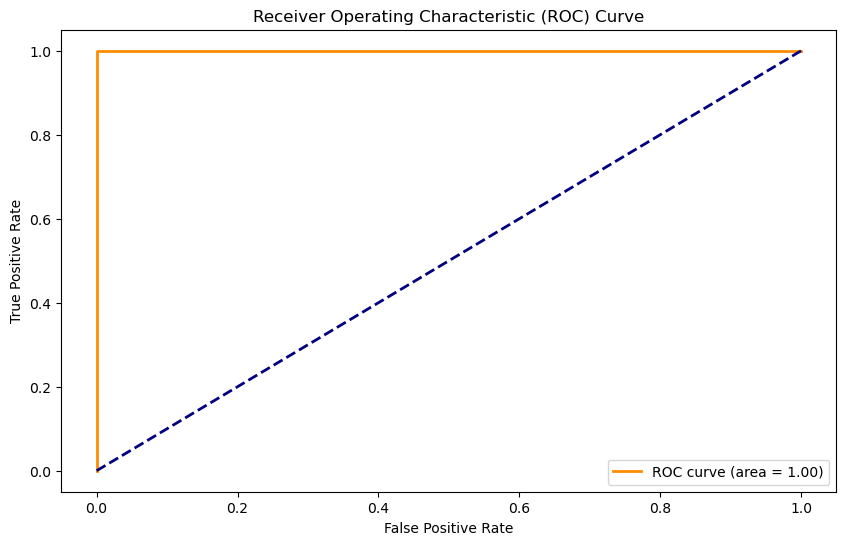

['',
 "cm=confusion_matrix(y_test,y_pred)\nprint(cm)\nsns.heatmap(cm, annot=True, fmt='.3g')\nplt.title('Confusion Matrix - Test Data')\nplt.xlabel('Predicted Label')\nplt.ylabel('True Label')\nplt.show()",
 'from sklearn import model_selection, naive_bayes, svm, metrics,feature_extraction',
 "x = pd.concat([encoder_cols,Scaled],axis=1)\ny = df['co2level']",
 'import numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler\nimport warnings\nfrom IPython.display import Image\nimport ipywidgets as widgets',
 'co2 = pd.read_csv(r"C:\\Users\\anike\\Downloads\\energy.csv")',
 'co2',
 'co2.Energy_type.unique()',
 'co2.head()',
 'co2.describe()',
 '# To find out total number of missing values in each column.\n\nco2.isnull().sum()',
 "#

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
In 

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

confusion matrix:
[[958   1]
 [  2  24]]


# Tunning with gridsearch cv 

In [138]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {
 'C': [0.1, 1, 10, 100],
 'kernel': ['linear'],
}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best hyperparameters found: ", grid_search.best_params_)
print("Best accuracy on the validation set: {:.2f}".format(grid_search.best_score_))

Best hyperparameters found:  {'C': 10, 'kernel': 'linear'}
Best accuracy on the validation set: 1.00


In [139]:
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear']})

In [140]:
print("Best hyperparameters found: ", grid_search.best_params_)
print("Best accuracy on the validation set: {:.2f}".format(grid_search.best_score_))

Best hyperparameters found:  {'C': 10, 'kernel': 'linear'}
Best accuracy on the validation set: 1.00


In [153]:
best_svm = grid_search.best_estimator_
best_svm.fit(x_train, y_train)
y_pred_2=best_model.predict(x_test)

C:\Users\anike\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [154]:
test_accuracy = best_svm.score(x_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 1.00


In [155]:
test_accuracy = best_svm.score(x_train, y_train)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 1.00


In [157]:
#the classification report is generated on the testing values
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       959
           1       0.96      0.92      0.94        26

    accuracy                           1.00       985
   macro avg       0.98      0.96      0.97       985
weighted avg       1.00      1.00      1.00       985



In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [159]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [160]:
print('Best Param: ', best_param)
print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', pre)
print('F1 Score: ', f1)
print('AUC-ROC: ', roc_auc)

Best Param:  {'C': 1, 'penalty': 'l2'}
Accuracy:  0.9969543147208122
Recall:  0.9230769230769231
Precision:  0.96
F1 Score:  0.9411764705882353
AUC-ROC:  0.9610170851046764


# PERFORMING NAIVE BAYES

In [161]:
 from sklearn import model_selection, naive_bayes, svm, metrics,feature_extraction

In [162]:
x = pd.concat([encoder_cols,Scaled],axis=1)
y = df['co2level']

In [163]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
x_train

,Country_Albania,Country_Algeria,Country_American Samoa,Country_Angola,Country_Antarctica,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,...,Energy_type_petroleum_n_other_liquids,Energy_type_renewables_n_other,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.779275,0.764213,-0.359526,-0.197043,-0.455435,-0.740110,-1.128361,-0.320796
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.588943,0.591898,0.123280,-0.183994,-0.369388,0.224459,1.509720,0.241534
4148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.445096,1.453473,-0.331993,-0.182734,-0.379366,-0.673875,-0.259204,-0.320796
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.339340,-0.355835,-0.309910,-0.196325,-0.294362,-0.297771,0.015105,-0.320796
1049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.439127,1.453473,-0.347086,-0.190578,-0.294362,-0.740110,-1.128361,-0.320796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.021428,-0.011205,-0.300044,-0.166301,-0.306750,-0.713633,-0.623397,-0.320796
466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.395352,1.367315,-0.327007,-0.197043,-0.424841,-0.727089,-0.657491,-0.278071
3092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.218213,-0.183520,-0.339194,-0.197043,-0.441473,1.006093,-0.551499,-0.295577
3772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.626337,-1.648198,-0.359526,-0.197043,-0.294362,-0.538646,-1.128361,-0.320796


In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [166]:
bayes = naive_bayes.MultinomialNB()

In [167]:
bayes.fit(x_train,y_train)

MultinomialNB()

In [168]:
y_pred_nb=bayes.predict(x_test)

In [169]:
accuracy=metrics.accuracy_score(y_test,y_pred_nb)
accuracy

0.9827411167512691

In [170]:
#calculating the accuracy of the model on the testing data
acc_nb=metrics.accuracy_score(y_test,y_pred_nb)
acc_nb

0.9827411167512691

In [171]:
 print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       959
           1       1.00      0.35      0.51        26

    accuracy                           0.98       985
   macro avg       0.99      0.67      0.75       985
weighted avg       0.98      0.98      0.98       985



In [271]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[73, 26],
       [20, 35]], dtype=int64)

In [272]:
yb=label_binarize(y, classes=[0,1,2])
nc = yb.shape[1] 

In [273]:
classifier = OneVsRestClassifier(bayes)

In [274]:
y_score=classifier.fit(x_train,y_train).predict(x_test)

In [275]:
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range (nc):
    fpr[i],tpr[i],_=roc_curve(y_test == i, y_score)
    roc_auc[i]=auc(fpr[i],tpr[i])

C:\Users\anike\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


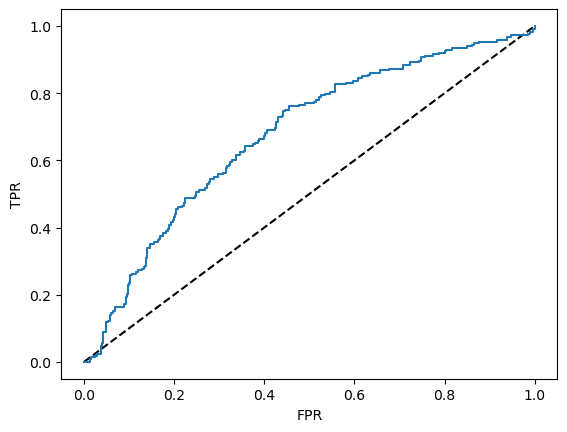

In [276]:
#AUC-ROC curve is plotted 
roc=bayes.predict_proba(x_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train,roc)
plt.plot([0,1], [0,1],'k--') #x=(0,1) y
plt.plot(fpr,tpr,label='SVM')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

[[965   0]
 [  3  31]]


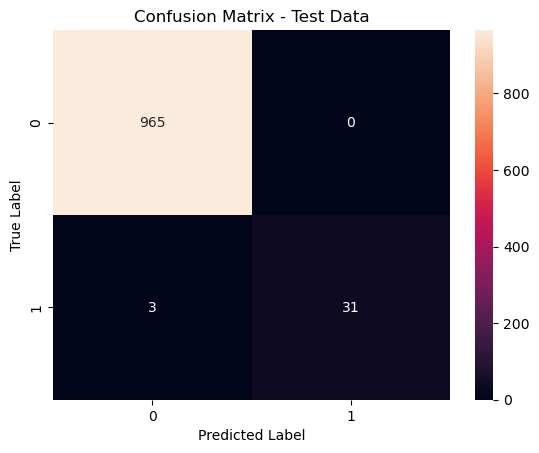

In [169]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# TUNNING IN NAIVE BAYES

In [170]:
 param_grid = {
'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]
}

In [171]:
bayes = naive_bayes.MultinomialNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [172]:
best_param = grid_search.best_params_
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred_1 = best_nb.predict(x_test)

In [173]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 1, 'fit_prior': True}


In [174]:
acc = accuracy_score(y_test, y_pred_1)
acc

0.984984984984985

In [175]:
print (classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.91      0.62      0.74        34

    accuracy                           0.98       999
   macro avg       0.95      0.81      0.86       999
weighted avg       0.98      0.98      0.98       999



[[958   1]
 [  2  24]]


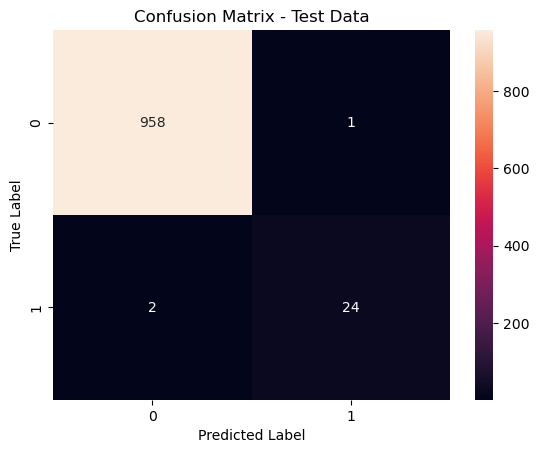

In [172]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [177]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [178]:
svm=SVC(kernel='linear')
param_dist={
    'C':uniform(loc=0,scale=10),
    'gamma':['scale','auto']+list(uniform(loc=0,scale=1).rvs(10)),
}

In [179]:
n_iter_search=20
random_search = RandomizedSearchCV(svcm, param_distributions=param_dist, n_iter=n_iter_search, cv=5, n_jobs=-1, random_state=42)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020DD42AF990>,
                                        'gamma': ['scale', 'auto',
                                                  0.21299383033965513,
                                                  0.9235652285377345,
                                                  0.8141165929547514,
                                                  0.28177155801654385,
                                                  0.571495769139306,
                                                  0.9341513836719333,
                                                  0.03607209893366781,
                                                  0.27997923144531545,
                                                  0.5198518425808453,
                                                  0.43261654548115935]},
                   random_state=42)

In [180]:
best_param = random_search.best_params_
best_model = random_search.best_estimator_
y_pred_2=best_model.predict(x_test)

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       1.00      0.91      0.95        34

    accuracy                           1.00       999
   macro avg       1.00      0.96      0.98       999
weighted avg       1.00      1.00      1.00       999



In [182]:
cm= confusion_matrix(y_test,y_pred_2)
print(cm)

[[965   0]
 [  2  32]]


# Performing KNN

In [183]:
ra = pd.read_csv(r"C:\Users\anike\OneDrive\Desktop\diabetes2.csv")

In [184]:
ra

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0,33.6,0.627,50,1
1,1.0,85.0,66,29,0,26.6,0.351,31,0
2,8.0,183.0,64,0,0,23.3,0.672,32,1
3,1.0,NaN,66,23,94,28.1,0.167,21,0
4,0.0,NaN,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180,32.9,0.171,63,0
764,2.0,122.0,70,27,0,36.8,0.340,27,0
765,5.0,121.0,72,23,112,26.2,0.245,30,0
766,1.0,126.0,60,0,0,30.1,0.349,47,1


In [185]:
ra.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,748.000000,714.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.822193,120.470588,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.359606,31.850410,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [186]:
ra.isnull().sum()

Pregnancies                 20
Glucose                     54
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [188]:
ra['Pregnancies'].fillna(1.0,inplace = True)
ra['Glucose'].fillna(1.0,inplace = True)


In [189]:
ra.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [191]:
numerical_cols=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(ra[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [193]:
x = ra.drop(['Outcome'],axis=1)
y = ra['Outcome']

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [195]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6.0,98.0,58,33,190,34.0,0.430,43
324,2.0,112.0,75,32,0,35.7,0.148,21
624,2.0,108.0,64,0,0,30.8,0.158,21
690,8.0,107.0,80,0,0,24.6,0.856,34
473,7.0,136.0,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9.0,165.0,88,0,0,30.4,0.302,49
534,1.0,77.0,56,30,56,33.3,1.251,24
344,8.0,95.0,72,0,0,36.8,0.485,57
296,2.0,146.0,70,38,360,28.0,0.337,29


In [196]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [197]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [198]:
y_pred = knn.predict(x_test)

In [199]:
knn.score(x_test,y_test)

0.7012987012987013

In [170]:
y_test.dtypes

dtype('int64')

In [260]:
acc_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_knn)

Accuracy: 0.7012987012987013


In [202]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[73, 26],
       [20, 35]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

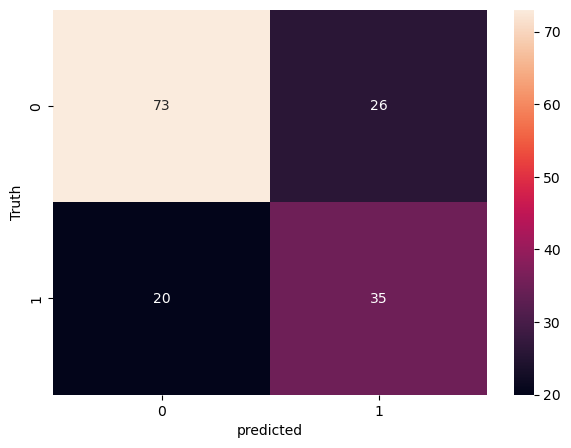

In [203]:
%matplotlib inline
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [204]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.57      0.64      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.70       154



# tunning for KNN

In [217]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [218]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [219]:
best_param = grid_search.best_params_
best_knn = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'], weights = best_param['weights'],p=best_param['p'])
best_knn.fit(x_train, y_train)
y_pred_1 = best_knn.predict(x_test)

In [220]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}


In [222]:
acc = accuracy_score(y_test, y_pred_1)
acc

0.7337662337662337

In [224]:
print (classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



[[77 22]
 [19 36]]


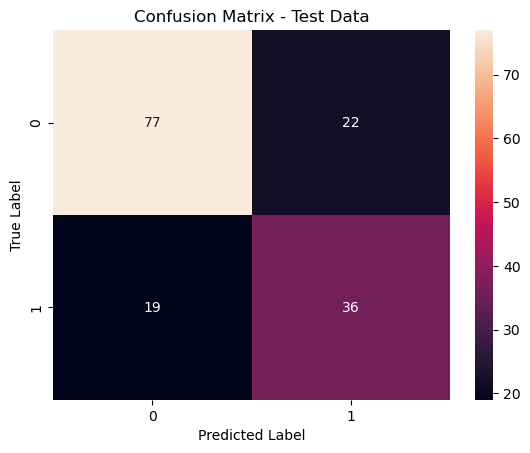

In [227]:
cm=confusion_matrix(y_test,y_pred_1)
print(cm)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [229]:
#Euclidean method 
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_classifier.fit(x_train, y_train)  

KNeighborsClassifier(metric='euclidean')

In [232]:
y_pred_e= knn_classifier.predict(x_test)

In [234]:
accuracy = accuracy_score(y_test, y_pred_e)  # For classification
print('accuracy:',accuracy)

accuracy: 0.7012987012987013


In [236]:
print(classification_report(y_test, y_pred_e))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.57      0.64      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.70       154



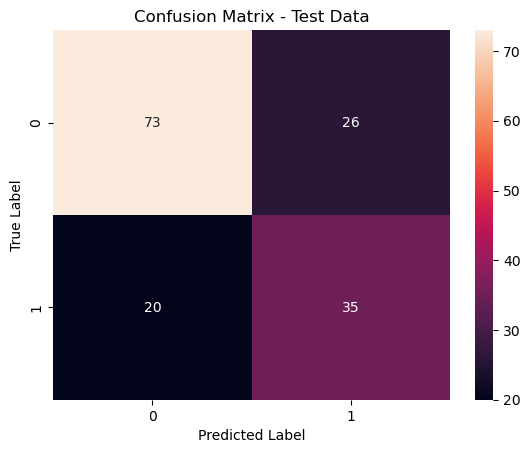

In [238]:
cm=confusion_matrix(y_test,y_pred_e)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [239]:
#Manhatan distance method

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

In [241]:
knn_classifier.fit(x_train, y_train) 

KNeighborsClassifier(metric='manhattan')

In [242]:
y_pred_m = knn_classifier.predict(x_test) 

In [243]:
accuracy = accuracy_score(y_test, y_pred_m) 
print('accuracy:',accuracy)

accuracy: 0.6948051948051948


In [245]:
print(classification_report(y_test, y_pred_m))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75        99
           1       0.56      0.64      0.60        55

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.70      0.69      0.70       154



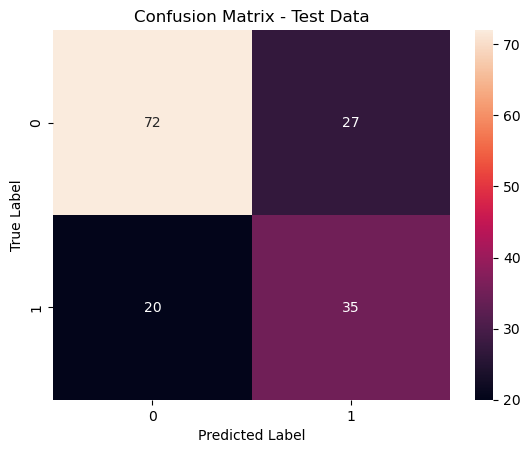

In [247]:
cm=confusion_matrix(y_test,y_pred_m)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [248]:
#Minkowsky distance method
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [249]:
y_pred_mi = knn_classifier.predict(x_test)

In [250]:
accuracy = accuracy_score(y_test, y_pred_mi)  # For classification
print('accuracy:',accuracy)

accuracy: 0.7012987012987013


In [252]:
print(classification_report(y_test, y_pred_mi))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.57      0.64      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.70       154



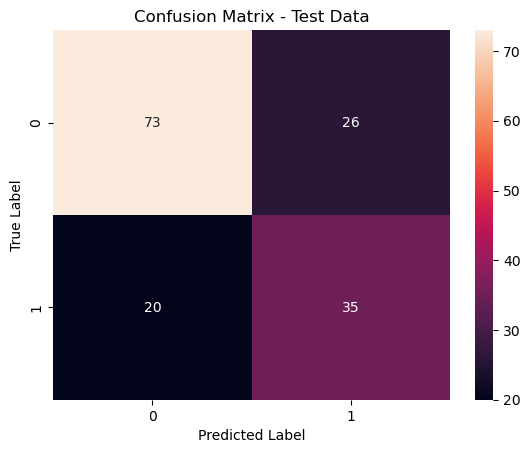

In [254]:
cm=confusion_matrix(y_test,y_pred_mi)
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [326]:
# Create a dictionary to store accuracy values for each model
df_acc = {
    "Model": ["Linear Regression", "Logistic Regression", "SVM", "Naive Bayes", "k-NN"],
    "Accuracy": [r2, acc_log, acc_svm, acc_nb, acc_knn]
}

# Create a Pandas DataFrame from the dictionary
accuracy_df = pd.DataFrame(df_acc)

# Display the DataFrame as a table
accuracy_df

,Model,Accuracy
0,Linear Regression,0.806681
1,Logistic Regression,0.997998
2,SVM,0.766234
3,Naive Bayes,0.642857
4,k-NN,0.701299


# After performing different types of algorithm on the co2 Emission  dataset we could see that each algorithm's model perform differently in order to classify the data and providing accuracy of doing the same. from the table above we can clearly conclude that the linear regression model is  performing well on the dataset giving us accuracy of 80%  which shows how good it gives the relation between dependent and independent variables. In classification models however the accuracies of all the models i.e. logistic,SVM,naive bayes,knn  have accuracy of los = 99% , SVM = 76% , Naive Bayes = 64% and KNN = 70% showing that their ability to classify the data is well, but if we want to choose one model out of these we would go for Linear Regression  as its accuracy is Best.